In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brist1d/sample_submission.csv
/kaggle/input/brist1d/activities.txt
/kaggle/input/brist1d/train.csv
/kaggle/input/brist1d/test.csv


In [3]:
data = pd.read_csv('../input/brist1d/train.csv')

/tmp/ipykernel_30/1334752450.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../input/brist1d/train.csv')


In [6]:
data.shape[0]

177024

In [3]:
data.head()

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      NaN      NaN      9.6      NaN      NaN   
1  p01_1   p01  06:25:00      NaN      NaN      9.7      NaN      NaN   
2  p01_2   p01  06:40:00      NaN      NaN      9.2      NaN      NaN   
3  p01_3   p01  06:55:00      NaN      NaN      8.7      NaN      NaN   
4  p01_4   p01  07:10:00      NaN      NaN      8.4      NaN      NaN   

   bg-5:30  bg-5:25  ...  activity-0:40  activity-0:35  activity-0:30  \
0      9.7      NaN  ...            NaN            NaN            NaN   
1      9.2      NaN  ...            NaN            NaN            NaN   
2      8.7      NaN  ...            NaN            NaN            NaN   
3      8.4      NaN  ...            NaN            NaN            NaN   
4      8.1      NaN  ...            NaN            NaN            NaN   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   activity-0:00  bg+1:00  
0            NaN     13.4  
1            NaN     12.8  
2            NaN     15.5  
3            NaN     14.8  
4            NaN     12.7  

[5 rows x 508 columns]

In [9]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

id             0
p_num          0
time           0
bg-5:55    27254
bg-5:50    18491
bg-5:45    13660
bg-5:40    27258
bg-5:35    18770
bg-5:30    13254
bg-5:25    27261
dtype: int64

In [5]:
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

id p_num      time  bg+1:00
0  p01_0   p01  06:10:00     13.4
1  p01_1   p01  06:25:00     12.8
2  p01_2   p01  06:40:00     15.5
3  p01_3   p01  06:55:00     14.8
4  p01_4   p01  07:10:00     12.7

In [6]:
data.dropna()

Empty DataFrame
Columns: [id, p_num, time, bg-5:55, bg-5:50, bg-5:45, bg-5:40, bg-5:35, bg-5:30, bg-5:25, bg-5:20, bg-5:15, bg-5:10, bg-5:05, bg-5:00, bg-4:55, bg-4:50, bg-4:45, bg-4:40, bg-4:35, bg-4:30, bg-4:25, bg-4:20, bg-4:15, bg-4:10, bg-4:05, bg-4:00, bg-3:55, bg-3:50, bg-3:45, bg-3:40, bg-3:35, bg-3:30, bg-3:25, bg-3:20, bg-3:15, bg-3:10, bg-3:05, bg-3:00, bg-2:55, bg-2:50, bg-2:45, bg-2:40, bg-2:35, bg-2:30, bg-2:25, bg-2:20, bg-2:15, bg-2:10, bg-2:05, bg-2:00, bg-1:55, bg-1:50, bg-1:45, bg-1:40, bg-1:35, bg-1:30, bg-1:25, bg-1:20, bg-1:15, bg-1:10, bg-1:05, bg-1:00, bg-0:55, bg-0:50, bg-0:45, bg-0:40, bg-0:35, bg-0:30, bg-0:25, bg-0:20, bg-0:15, bg-0:10, bg-0:05, bg-0:00, insulin-5:55, insulin-5:50, insulin-5:45, insulin-5:40, insulin-5:35, insulin-5:30, insulin-5:25, insulin-5:20, insulin-5:15, insulin-5:10, insulin-5:05, insulin-5:00, insulin-4:55, insulin-4:50, insulin-4:45, insulin-4:40, insulin-4:35, insulin-4:30, insulin-4:25, insulin-4:20, insulin-4:15, insulin-4:10, insulin-4:05, insulin-4:00, insulin-3:55, ...]
Index: []

[0 rows x 508 columns]

In [8]:
f_data = data.fillna(method='bfill', axis=0)
f_data.head()

/tmp/ipykernel_30/3806054418.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  f_data = data.fillna(method='bfill', axis=0)


id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      8.2     13.8      9.6      8.2     13.4   
1  p01_1   p01  06:25:00      8.2     13.8      9.7      8.2     13.4   
2  p01_2   p01  06:40:00      8.2     13.8      9.2      8.2     13.4   
3  p01_3   p01  06:55:00      8.2     13.8      8.7      8.2     13.4   
4  p01_4   p01  07:10:00      8.2     13.8      8.4      8.2     13.4   

   bg-5:30  bg-5:25  ...  activity-0:40  activity-0:35  activity-0:30  \
0      9.7      8.2  ...           Walk           Walk           Walk   
1      9.2      8.2  ...           Walk           Walk           Walk   
2      8.7      8.2  ...           Walk           Walk           Walk   
3      8.4      8.2  ...           Walk           Walk           Walk   
4      8.1      8.2  ...           Walk           Walk           Walk   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0           Walk           Walk           Walk           Walk           Walk   
1           Walk           Walk           Walk           Walk           Walk   
2           Walk           Walk           Walk           Walk           Walk   
3           Walk           Walk           Walk           Walk           Walk   
4           Walk           Walk           Walk           Walk           Walk   

   activity-0:00  bg+1:00  
0           Walk     13.4  
1           Walk     12.8  
2           Walk     15.5  
3           Walk     14.8  
4           Walk     12.7  

[5 rows x 508 columns]

In [10]:
# get the number of missing data points per column
missing_values_count = f_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

id         0
p_num      0
time       0
bg-5:55    0
bg-5:50    0
bg-5:45    0
bg-5:40    0
bg-5:35    0
bg-5:30    0
bg-5:25    0
dtype: int64

In [1]:
f_data.sum()

NameError: name 'f_data' is not defined

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#data['time_parsed'] = pd.to_datetime(data['time'], format="%HH/%MM/%SS")
f_data['time_parsed'] = pd.to_datetime(f_data['time'],format= '%H:%M:%S' ).dt.time

In [19]:
f_data['time_parsed'].dtype

dtype('O')

In [23]:
f_data['time_set'] = np.arange(len(data.index))

/tmp/ipykernel_30/822451918.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Glucose')

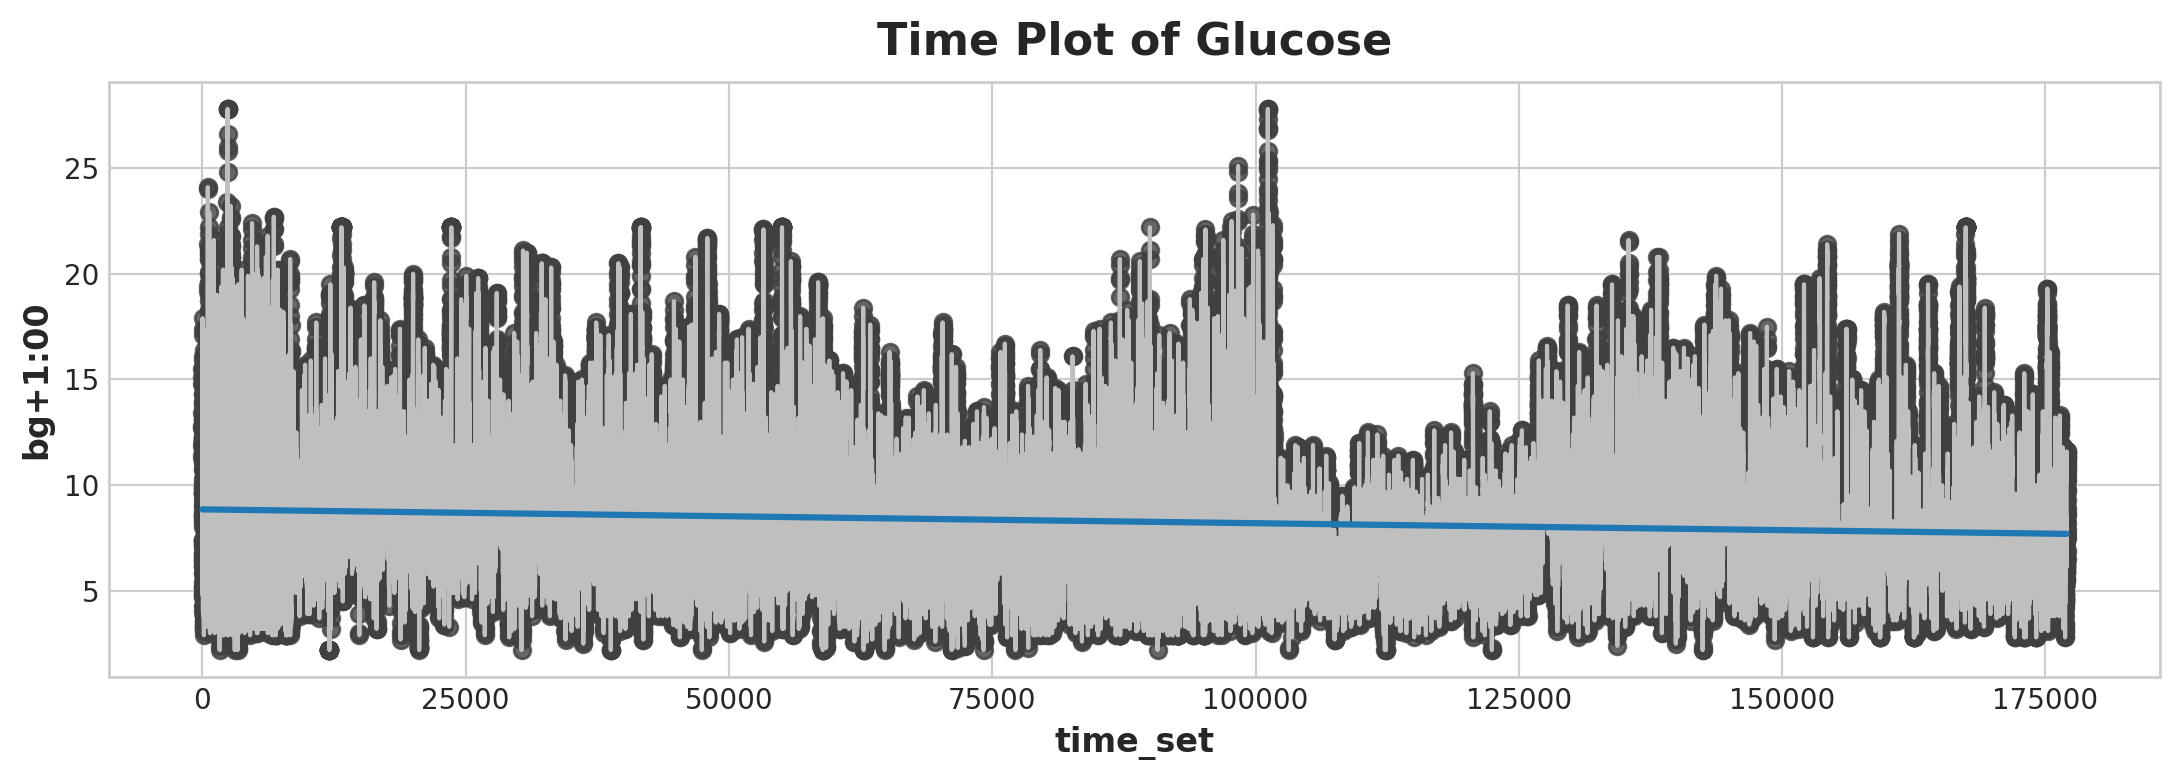

In [24]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time_set', 'bg+1:00', data=f_data, color='0.75')
ax = sns.regplot(x='time_set', y='bg+1:00', data=f_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Glucose')

In [25]:
from sklearn.linear_model import LinearRegression

X = f_data.loc[:, ['insulin-0:05']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = f_data.loc[:, 'bg+1:00']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

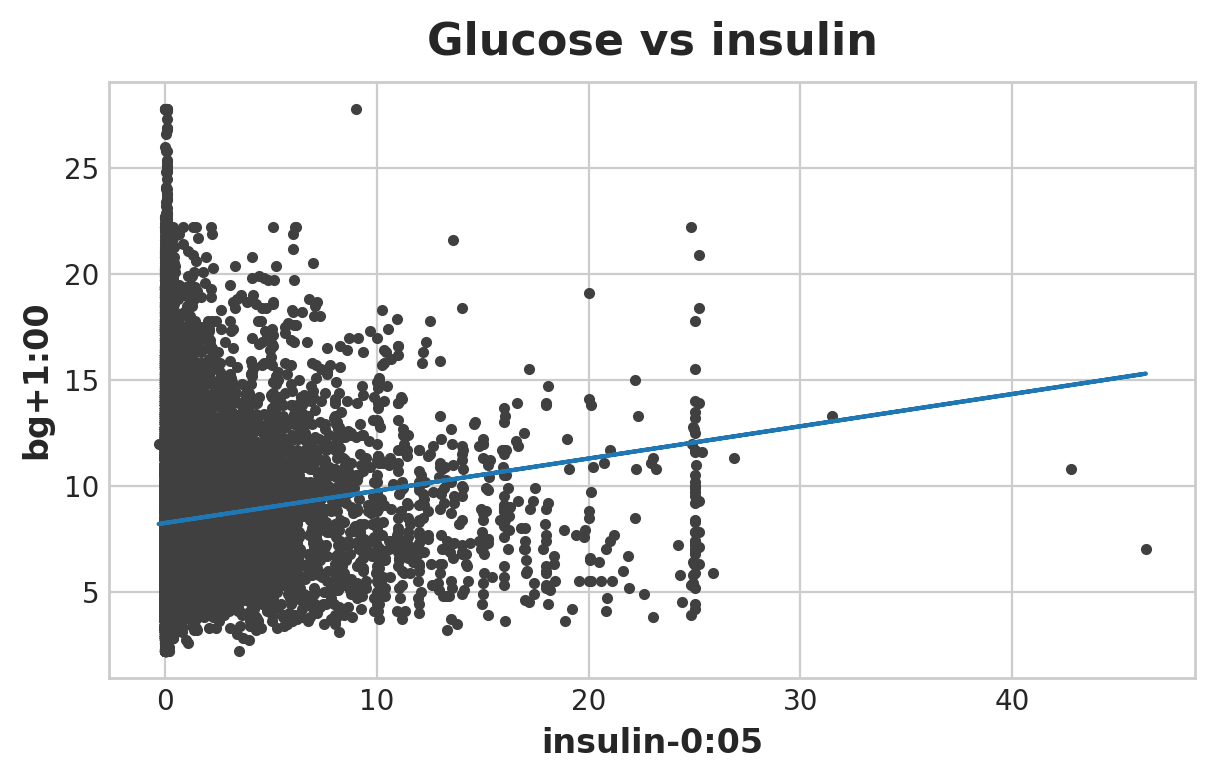

In [26]:
fig, ax = plt.subplots()
ax.plot(X['insulin-0:05'], y, '.', color='0.25')
ax.plot(X['insulin-0:05'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('bg+1:00')
ax.set_xlabel('insulin-0:05')
ax.set_title('Glucose vs insulin');

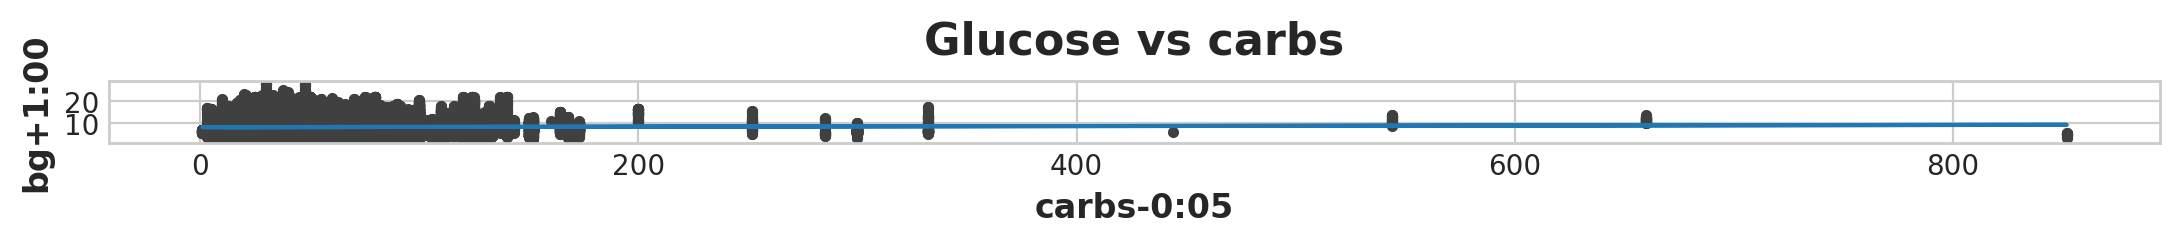

In [27]:
X = f_data.loc[:, ['carbs-0:05']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = f_data.loc[:, 'bg+1:00']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

fig, ax = plt.subplots()
ax.plot(X['carbs-0:05'], y, '.', color='0.25')
ax.plot(X['carbs-0:05'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('bg+1:00')
ax.set_xlabel('carbs-0:05')
ax.set_title('Glucose vs carbs');